In [2]:
import os
import urllib.request 

import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

%matplotlib inline

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/"
OLYMPIC_PATH = os.path.join("dataset", "olympic teams")
OLYMPIC_URL = DOWNLOAD_ROOT + "/beginner_ml/teams.csv"

In [4]:
def fetch_olympic_data(olympic_url=OLYMPIC_URL, olympic_path=OLYMPIC_PATH):
    if not os.path.isdir(olympic_path):
        os.makedirs(olympic_path)

    csv_file = os.path.join(olympic_path, "teams.csv")
    urllib.request.urlretrieve(olympic_url, csv_file)

In [5]:
def load_olympic_data(olympic_path=OLYMPIC_PATH):
    csv_file = os.path.join(olympic_path, "teams.csv")
    print(csv_file)
    return pd.read_csv(csv_file)

In [6]:
fetch_olympic_data()

In [7]:
olympic = load_olympic_data()

dataset\olympic teams\teams.csv


## Take a Quick Look at the Data Structure

In [8]:
olympic.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [9]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [10]:
olympic.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


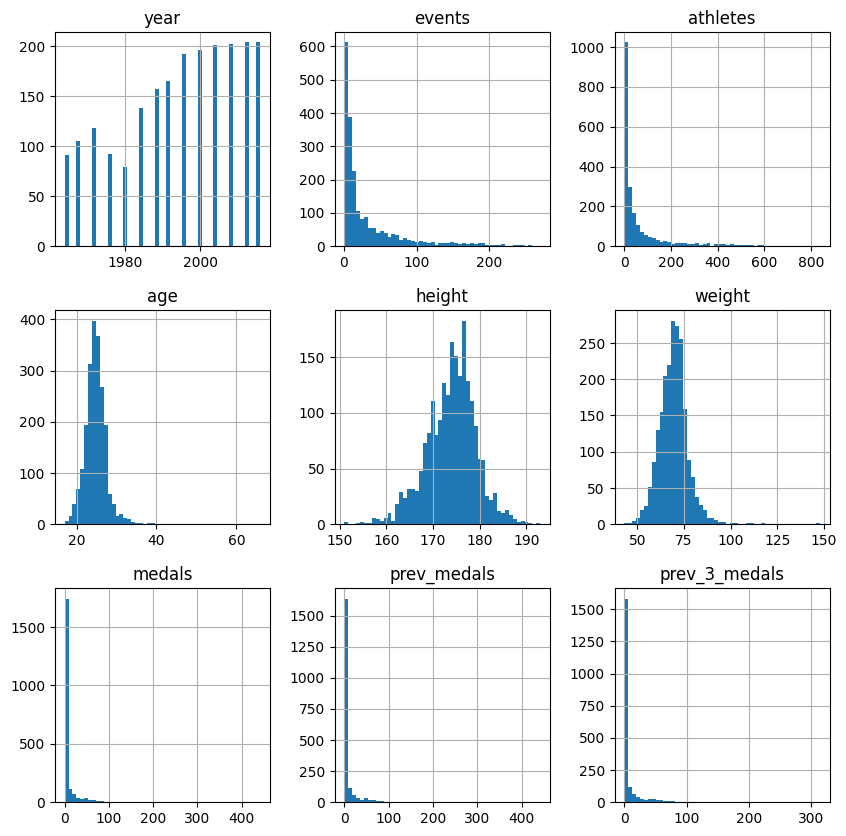

In [11]:
olympic.hist(bins=50 ,figsize=(10,10));

## Create a Test Set

In [36]:
features = ['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'prev_medals', 'prev_3_medals']
X = olympic[features].copy()
y = olympic.loc[:,"medals"]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46, test_size=0.2)
X_train.head()

,team,country,year,events,athletes,age,height,weight,prev_medals,prev_3_medals
1719,SGP,Singapore-1,2004,16,22,24.6,170.1,64.0,0.0,0.0
528,DEN,Denmark,1972,73,155,26.3,180.6,75.0,17.0,17.3
2045,USA,United States,1976,189,554,23.0,177.3,71.0,171.0,168.7
518,CYP,Cyprus,2012,12,13,25.8,178.0,73.5,0.0,0.0
1226,MAR,Morocco,1976,9,9,25.2,173.2,62.2,0.0,0.0


In [42]:
y_train.head()

1719      0
528       1
2045    164
518       1
1226      0
Name: medals, dtype: int64

## Visualizing Data

In [50]:
olympic_y_train = y_train.copy()

In [51]:
olympic_y_train.sort_values(ascending=False )

2027    442
2046    352
2052    317
2028    300
2026    286
       ... 
642       0
1822      0
335       0
610       0
823       0
Name: medals, Length: 1715, dtype: int64

In [73]:
olympic_X_train = X_train.copy()
olympic_X_train_num = olympic_X_train.select_dtypes(include='number')

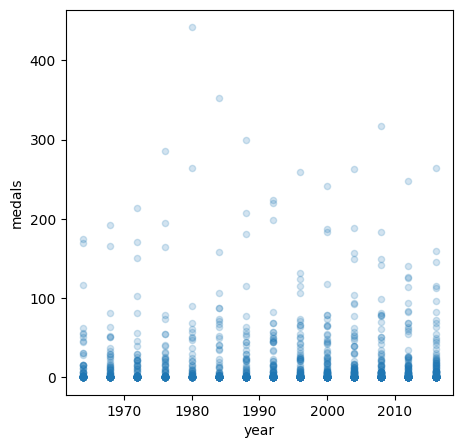

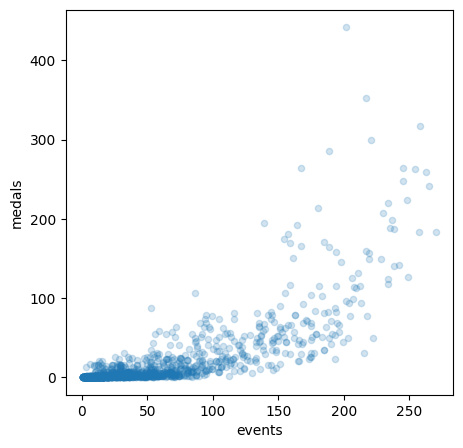

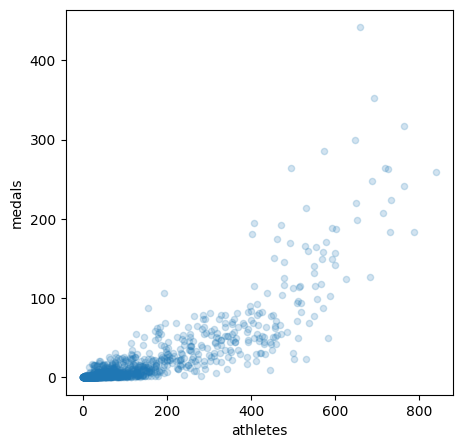

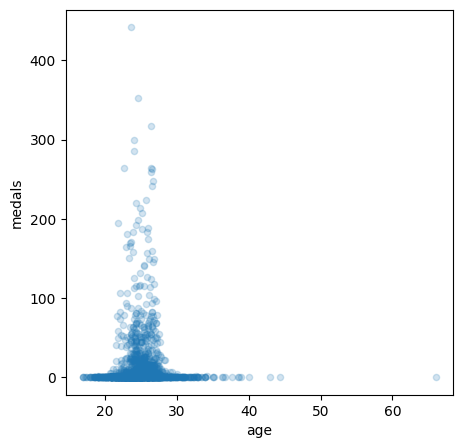

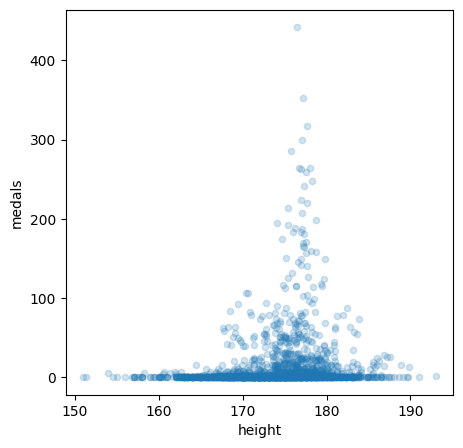

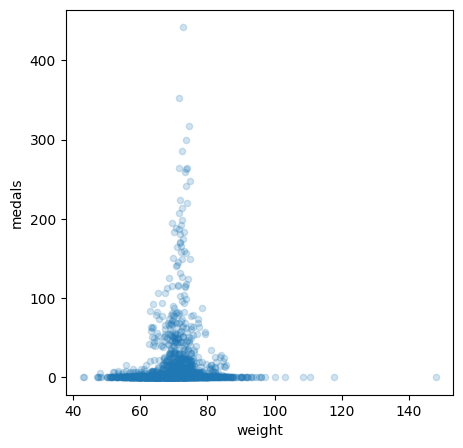

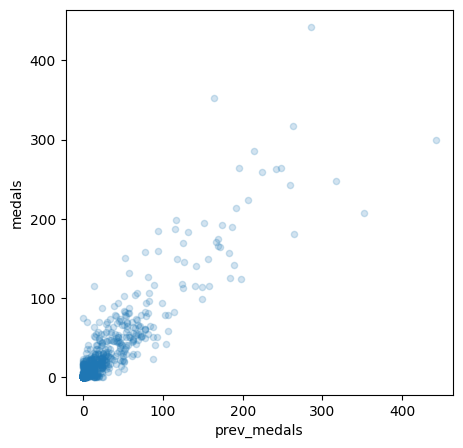

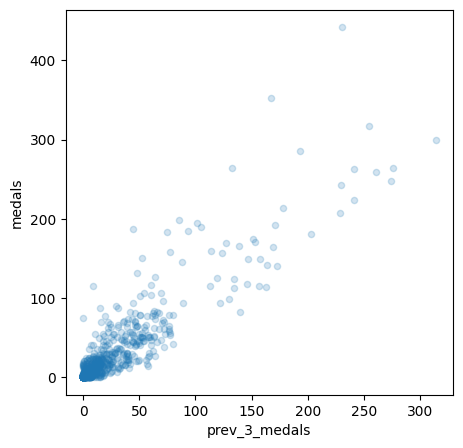

In [89]:
for column in olympic_X_train_num.columns:

    olympic.plot(kind= 'scatter', x=column , y='medals',alpha=0.2, figsize=(5,5))

## Experimenting Attribute Combinations

In [90]:
olympic_X_train["BMI"] = olympic_X_train["weight"] / olympic_X_train["height"] / olympic_X_train["height"] * 1000

In [97]:
corr_matrix = olympic_X_train.copy()
corr_matrix['medals'] = y_train.copy()

In [99]:
corr_matrix = corr_matrix.select_dtypes(include='number').corr()
corr_matrix['medals'].sort_values(ascending=False)

medals           1.000000
prev_medals      0.995184
prev_3_medals    0.994623
athletes         0.965198
events           0.947364
height          -0.327785
year            -0.441079
age             -0.487451
BMI             -0.600048
weight          -0.617033
Name: medals, dtype: float64

In [100]:
olympic_X_train = olympic_X_train.drop('BMI', axis=1)
olympic_X_train

,team,country,year,events,athletes,age,height,weight,prev_medals,prev_3_medals
1719,SGP,Singapore-1,2004,16,22,24.6,170.1,64.0,0.0,0.0
528,DEN,Denmark,1972,73,155,26.3,180.6,75.0,17.0,17.3
2045,USA,United States,1976,189,554,23.0,177.3,71.0,171.0,168.7
518,CYP,Cyprus,2012,12,13,25.8,178.0,73.5,0.0,0.0
1226,MAR,Morocco,1976,9,9,25.2,173.2,62.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
823,GUY,Guyana,1968,6,6,22.8,174.2,67.5,0.0,0.0
544,DJI,Djibouti,2000,2,2,25.0,164.0,55.0,0.0,0.3
1340,MON,Monaco,1976,6,10,36.3,174.7,75.6,0.0,0.0
658,FIN,Finland,1984,76,107,26.5,178.3,73.2,9.0,8.3


## Data Cleaning

In [104]:
olympic_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1719 to 1576
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           1715 non-null   object 
 1   country        1715 non-null   object 
 2   year           1715 non-null   int64  
 3   events         1715 non-null   int64  
 4   athletes       1715 non-null   int64  
 5   age            1715 non-null   float64
 6   height         1715 non-null   float64
 7   weight         1715 non-null   float64
 8   prev_medals    1618 non-null   float64
 9   prev_3_medals  1618 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 147.4+ KB


## Missing Values
---
### Numeric Values

In [167]:
X_train_num = olympic_X_train.drop(['country', 'team'], axis=1).copy()
X_test_num  = X_test.drop(['country', 'team'], axis=1).copy()

In [168]:
# Number of missing values in each column of training data
missing_val_count_by_column = (olympic_X_train.isnull().sum())
columns_with_missing_values = missing_val_count_by_column[missing_val_count_by_column > 0].index.tolist()

In [169]:
reduced_X_train = olympic_X_train.drop(columns_with_missing_values, axis=1)
reduced_X_test = X_test.drop(columns_with_missing_values, axis=1)

In [170]:
reduced_X_test

,team,country,year,events,athletes,age,height,weight
1008,IVB,British Virgin Islands,2000,1,1,25.0,179.0,74.0
651,FIJ,Fiji,2012,9,9,25.1,175.6,80.0
1588,POL,Poland,2000,133,240,25.4,178.3,75.7
1632,QAT,Qatar,1988,10,13,22.5,176.8,70.4
568,ECU,Ecuador,1972,4,4,18.5,176.5,60.8
...,...,...,...,...,...,...,...,...
692,GAB,Gabon,1984,4,4,21.2,167.5,65.2
326,CAF,Central African Republic,2008,3,3,21.3,172.5,71.5
312,BUR,Burkina Faso,1988,7,9,23.8,176.5,71.0
697,GAB,Gabon,2004,5,5,24.0,169.4,69.6


In [180]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ='median')
X_train_imputed = imputer.fit_transform(X_train_num)
X_test_imputed  = imputer.fit_transform(X_test_num)

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_num.columns)
X_test_imputed  = pd.DataFrame(X_test_imputed, columns=X_test_num.columns)

In [181]:
X_test_imputed

,year,events,athletes,age,height,weight,prev_medals,prev_3_medals
0,2000.0,1.0,1.0,25.0,179.0,74.0,0.0,0.0
1,2012.0,9.0,9.0,25.1,175.6,80.0,0.0,0.0
2,2000.0,133.0,240.0,25.4,178.3,75.7,22.0,29.7
3,1988.0,10.0,13.0,22.5,176.8,70.4,0.0,0.0
4,1972.0,4.0,4.0,18.5,176.5,60.8,0.0,0.0
...,...,...,...,...,...,...,...,...
424,1984.0,4.0,4.0,21.2,167.5,65.2,0.0,0.0
425,2008.0,3.0,3.0,21.3,172.5,71.5,0.0,0.0
426,1988.0,7.0,9.0,23.8,176.5,71.0,0.0,0.0
427,2004.0,5.0,5.0,24.0,169.4,69.6,0.0,0.0


---
### Categorical Variables

In [140]:
olympic_X_train.dtypes == object

team              True
country           True
year             False
events           False
athletes         False
age              False
height           False
weight           False
prev_medals      False
prev_3_medals    False
dtype: bool

In [143]:
categorical_features = olympic_X_train.columns[olympic_X_train.dtypes == object].tolist()
categorical_features

['team', 'country']

In [152]:
X_train_cat = olympic_X_train[categorical_features].copy()
X_test_cat  = X_test[categorical_features].copy()

In [156]:
## Both Categorical Features are many cardinality
X_train_cat[categorical_features].nunique()

team       219
country    232
dtype: int64

In [188]:
# TODO: Adding new technique that can deal with the Categorical Features with high cardinality 

In [ ]:
# # TODO: Cross-validation and pipeline

### Training and Evaluating on the Training Set


In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def score_lin_reg(X_train, X_valid, y_train, y_valid):
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    
    return mean_absolute_error(y_valid, preds)

In [173]:
print("MAE from Linear Regression (Drop missing value):") 
print(score_lin_reg(reduced_X_train.drop(categorical_features, axis=1), reduced_X_test.drop(categorical_features, axis=1), y_train, y_test))

MAE from Linear Regression (Drop missing value):
5.710036323119006


In [182]:
print("MAE from Linear Regression (Imputed missing value):") 
print(score_lin_reg(X_train_imputed, X_test_imputed, y_train, y_test))

MAE from Linear Regression (Imputed missing value):
3.8567771271406923


In [163]:
from sklearn.linear_model import LogisticRegression

def score_log_reg(X_train, X_valid, y_train, y_valid):
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    
    return mean_absolute_error(y_valid, preds)

In [175]:
print("MAE from Logistic Regression (Drop missing value):") 
print(score_log_reg(reduced_X_train.drop(categorical_features, axis=1), reduced_X_test.drop(categorical_features, axis=1), y_train, y_test))

MAE from Logistic Regression (Drop missing value):
4.585081585081585


c:\Users\CLIENT\Desktop\New folder (2)\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
print("MAE from Logistic Regression (Imputed missing value):") 
print(score_log_reg(X_train_imputed, X_test_imputed, y_train, y_test))

MAE from Logistic Regression (Imputed missing value):
3.687645687645688


c:\Users\CLIENT\Desktop\New folder (2)\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
from sklearn.svm import SVR

def score_SVR_linear(X_train, X_valid, y_train, y_valid):
    
    model = SVR(kernel= 'linear')
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    
    return mean_absolute_error(y_valid, preds)

In [184]:
print("MAE from SVM Linear (Drop missing value):") 
print(score_SVR_linear(reduced_X_train.drop(categorical_features, axis=1), reduced_X_test.drop(categorical_features, axis=1), y_train, y_test))

MAE from SVM Linear (Drop missing value):
4.859734983637505


In [185]:
print("MAE from SVM Linear (Drop missing value):") 
print(score_SVR_linear(reduced_X_train.drop(categorical_features, axis=1), reduced_X_test.drop(categorical_features, axis=1), y_train, y_test))

MAE from SVM Linear (Drop missing value):
4.859734983637505


In [165]:
from sklearn.svm import SVR

def score_SVR_rbf(X_train, X_valid, y_train, y_valid):
    
    model = SVR(kernel= 'rbf')
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    
    return mean_absolute_error(y_valid, preds)

In [186]:
print("MAE from SVM radial basis function (Drop missing value):") 
print(score_SVR_rbf(reduced_X_train.drop(categorical_features, axis=1), reduced_X_test.drop(categorical_features, axis=1), y_train, y_test))

MAE from SVM radial basis function (Drop missing value):
6.735361373859709


In [187]:
print("MAE from SVM radial basis function (Drop missing value):") 
print(score_SVR_rbf(reduced_X_train.drop(categorical_features, axis=1), reduced_X_test.drop(categorical_features, axis=1), y_train, y_test))

MAE from SVM radial basis function (Drop missing value):
6.735361373859709
